### Importing relevant Libraries

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import re
from sklearn.tree import DecisionTreeClassifier

### Importing Dataset

In [341]:
data=pd.read_csv("C:/Users/PAVILION/PycharmProjects/Vehicle_Loan_Default_Project/data/data_files/train.csv")

### Exploratory Data Analysis

In [342]:
data_1=pd.DataFrame(data.iloc[:,0:20])
data_2=pd.DataFrame(data.iloc[:,20:])


In [343]:
data_1.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0


In [344]:
data_2.head()

,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,No Bureau History Available,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,No Bureau History Available,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,L-Very High Risk,3,0,0,0,0,0,0,0,0,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,No Bureau History Available,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [347]:
data.isna().sum()
#observed null values in the "Employment type" column which is to be filled with unemployed

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [348]:
#cns.score.description can be dropped as we have the equivalent quantitative measure
data["PERFORM_CNS.SCORE"].count()
data["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [349]:
#high dimensional data which are to be dropped
data.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

### Feature engineering:Check for high default rate branches
Based on the percentage default values, branch id's will be label encoded into 3 categories during preprocessing:
* High risk (more than 25%) : 2
* Medium risk (between 25% and 10%):1
* low risk (less than 10%): 0

In [350]:
branch_stats = (
    data.groupby("branch_id")
      .agg(
          total_loans=("loan_default", "count"),
          default_percentage=("loan_default", lambda x: x.mean() * 100)
      )
      .reset_index()
)

branch_default_pct = branch_stats.sort_values(
    by="total_loans",
    ascending=True
)

print(branch_default_pct)

    branch_id  total_loans  default_percentage
63        158           69           27.536232
50        111           89           22.471910
42         84          156           19.871795
81        261          176           22.159091
70        217          183           24.590164
..        ...          ...                 ...
20         36         8832           29.676178
3           5         9218           22.206552
2           3         9230           17.486457
30         67        11328           19.403249
1           2        13138           18.686254

[82 rows x 3 columns]


Based the unique values in each column, we can remove the columns with high dimensionality and add no value(DOB etc)/ where we have equivalent quantitative measures(CNS description)/with the same value for all(Mobile no flag).These include:
1. UniqueID
2. supplier_id
3. manufacturer_id
4. Current_pincode_ID
5. Date.of.Birth
6. DisbursalDate
7. State_ID
8. Employee_code_ID
9. MobileNo_Avl_Flag
10. PERFORM_CNS.SCORE.DESCRIPTION


Also, columns with only 2/3 categories will be One-hot-encoded.These include:



1. Employment.Type




Also duration has to be calculated for the cells Avg account age/credit history length

### Data Pre Processing

In [351]:


def preprocess_and_split(data, test_size=0.2, random_state=42):

    columns_to_remove = [
        "UniqueID",
        "supplier_id",
        "manufacturer_id",
        "Current_pincode_ID",
        "Date.of.Birth",
        "DisbursalDate",
        "State_ID",
        "Employee_code_ID",
        "MobileNo_Avl_Flag",
        "PERFORM_CNS.SCORE.DESCRIPTION"
    ]

    columns_to_encode = ["Employment.Type"]

    columns_to_transform = [
        "AVERAGE.ACCT.AGE",
        "CREDIT.HISTORY.LENGTH"
    ]


    #  Train-test split

    train_df, test_df = train_test_split(
        data,
        test_size=test_size,
        stratify=data["loan_default"],
        random_state=random_state
    )

    # Separate target
    y_train = train_df["loan_default"]
    y_test = test_df["loan_default"]

    X_train = train_df.drop(columns=["loan_default"])
    X_test = test_df.drop(columns=["loan_default"])


    #  Drop irrelevant columns

    X_train.drop(columns=columns_to_remove, inplace=True)
    X_test.drop(columns=columns_to_remove, inplace=True)


    #  Fill missing Employment.Type

    X_train["Employment.Type"] = X_train["Employment.Type"].fillna("Unemployed")
    X_test["Employment.Type"] = X_test["Employment.Type"].fillna("Unemployed")


    #  Transform age-related columns

    for col in columns_to_transform:
        for df in [X_train, X_test]:
            df[col + "_yrs"] = (
                df[col].astype(str)
                .str.extract(r"(\d+)(?=yrs)")
                .astype(float)
            )

            df[col + "_mon"] = (
                df[col].astype(str)
                .str.extract(r"(\d+)(?=mon)")
                .astype(float)
            )

            df.drop(columns=col, inplace=True)


    #  One-hot encode Employment.Type (train-first)

    train_dummies = pd.get_dummies(X_train["Employment.Type"],drop_first=True).astype(int)
    test_dummies = pd.get_dummies(X_test["Employment.Type"],drop_first=True).astype(int)

    # Align test to train columns
    test_dummies = test_dummies.reindex(
        columns=train_dummies.columns,
        fill_value=0
    )

    X_train = pd.concat([X_train.drop(columns=["Employment.Type"]), train_dummies], axis=1)
    X_test = pd.concat([X_test.drop(columns=["Employment.Type"]), test_dummies], axis=1)


    # Branch risk encoding (TRAIN ONLY)

    branch_stats = (
        train_df.groupby("branch_id")
        .agg(
            default_percentage=("loan_default", lambda x: x.mean() * 100)
        )
        .reset_index()
    )

    branch_stats["branch_risk_level"] = pd.cut(
        branch_stats["default_percentage"],
        bins=[-float("inf"), 10, 25, float("inf")],
        labels=[0, 1, 2]
    ).astype(int)

    # Merge into train and test
    X_train = X_train.merge(
        branch_stats[["branch_id", "branch_risk_level"]],
        on="branch_id",
        how="left"
    )

    X_test = X_test.merge(
        branch_stats[["branch_id", "branch_risk_level"]],
        on="branch_id",
        how="left"
    )

    # Handle unseen branches in test
    X_test["branch_risk_level"].fillna(
        branch_stats["branch_risk_level"].median(),
        inplace=True
    )

    X_train.drop(columns=["branch_id"], inplace=True)
    X_test.drop(columns=["branch_id"], inplace=True)

    return X_train, y_train, X_test, y_test


In [352]:
X_train, y_train, X_test, y_test=preprocess_and_split(data)

C:\Users\PAVILION\AppData\Local\Temp\ipykernel_22824\2002902689.py:117: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["branch_risk_level"].fillna(


In [353]:
X_test.isna().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.AMT                     0
SEC.INSTAL.AMT                         0
NEW.ACCTS.IN.LAST.SIX.MONTHS           0
DELINQUENT.ACCTS

Heat Map of the variables

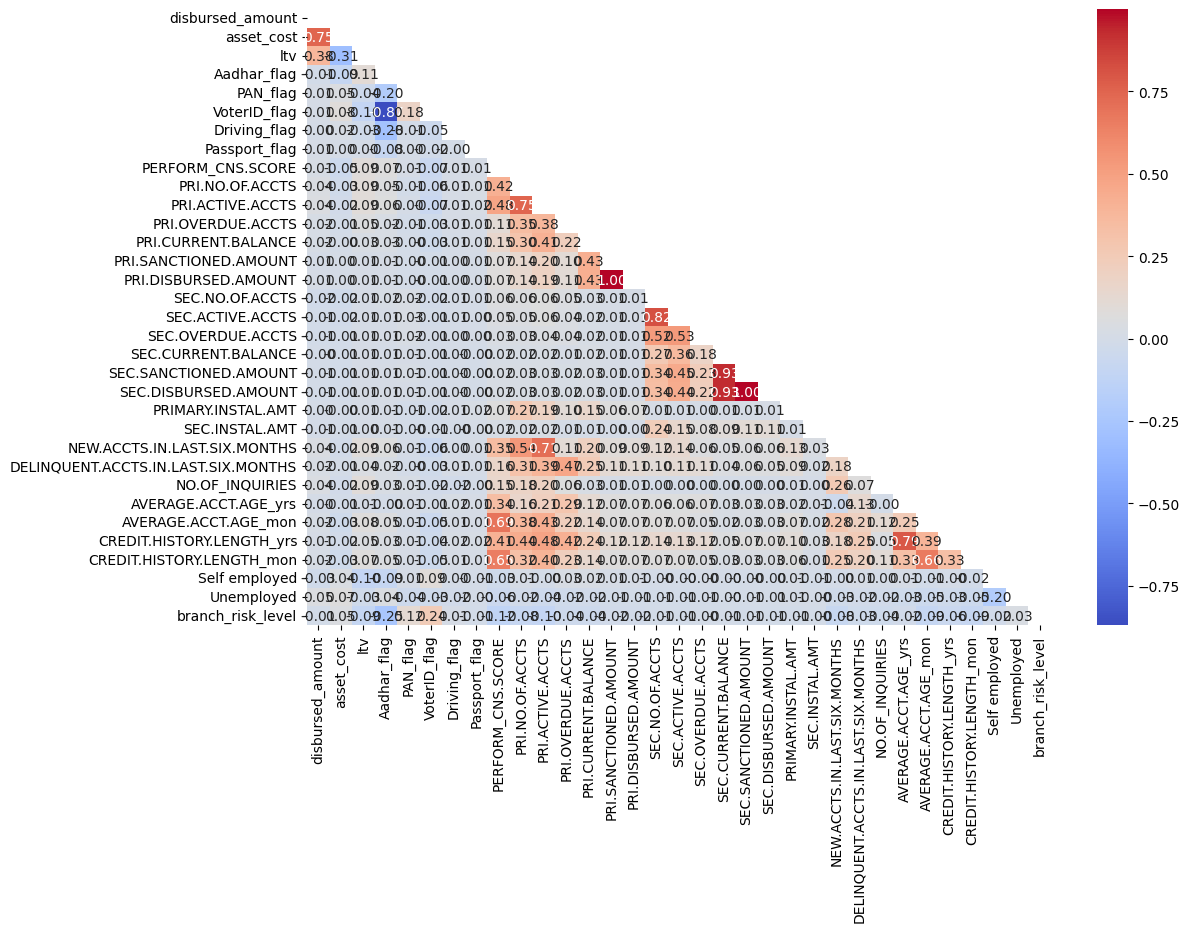

In [354]:


corr =X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f"
)
plt.show()

Checking for imbalance in the dataset

In [355]:
# Baseline PR-AUC
data["loan_default"].value_counts(normalize=True) * 100


loan_default
0    78.292888
1    21.707112
Name: proportion, dtype: float64

In [356]:

threshold = 0.8

# Take absolute correlations
corr_abs = corr.abs()

# Mask lower triangle + diagonal
upper = corr_abs.where(
    np.triu(np.ones(corr_abs.shape), k=1).astype(bool)
)

# Filter strong correlations
strong_corr = upper.stack().loc[lambda x: x >= threshold]

strong_corr


Aadhar_flag            VoterID_flag             0.869003
PRI.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT     0.999787
SEC.NO.OF.ACCTS        SEC.ACTIVE.ACCTS         0.817782
SEC.CURRENT.BALANCE    SEC.SANCTIONED.AMOUNT    0.928464
                       SEC.DISBURSED.AMOUNT     0.929090
SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT     0.999707
dtype: float64

In [357]:
columns_drop=["VoterID_flag","PRI.DISBURSED.AMOUNT","SEC.SANCTIONED.AMOUNT","SEC.DISBURSED.AMOUNT"]


### MODELS:

#### 1. 1.LOGISTIC REGRESSION

In [358]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        solver="lbfgs"
    ))
])
pipe.fit(X_train,y_train) #fitting test data


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('logit', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

In [359]:
pipe.named_steps["logit"].classes_


array([0, 1])

In [360]:
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]  # probability of positive class
from sklearn.metrics import  precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))



Precision: 0.2872791200865489
Recall   : 0.6296186524402292
F1-score : 0.39453971398501825


In [361]:

y_proba = pipe.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.3084428010786837


In [362]:
results=[]
results.append({
        "Model": "Logistic regression",
        "F1-score": f1_score(y_test, y_pred),
    "PR-AUC": average_precision_score(y_test, y_proba)
    })


### 2.Logistic Regression with elastinet

In [363]:

pipe_enet = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(
        penalty="elasticnet",
        solver="saga",          # REQUIRED
        l1_ratio=0.5,           # 0 = L2, 1 = L1
        C=1.0,                  # inverse regularization strength
        class_weight="balanced",
        max_iter=5000,
        random_state=42
    ))
])

pipe_enet.fit(X_train, y_train)


C:\Users\PAVILION\PycharmProjects\Vehicle_Loan_Default_Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('logit', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'elasticnet'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

In [364]:
y_pred = pipe_enet.predict(X_test)
y_proba = pipe_enet.predict_proba(X_test)[:, 1]  # probability of positive class


In [365]:


print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

Precision: 0.28744026688305835
Recall   : 0.6299150365540407
F1-score : 0.3947498761763249


In [366]:

y_proba = pipe_enet.predict_proba(X_test)[:,1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.3084735060820665


In [367]:

results.append({
        "Model": "Logistic regression with elastinet",
        "F1-score": f1_score(y_test, y_pred),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

### 3.Descision Tree


In [368]:


dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=50,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",50
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [369]:

from sklearn.metrics import  precision_score, recall_score, f1_score

y_pred_dt = dt.predict(X_test)

print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1-score :", f1_score(y_test, y_pred_dt))



Precision: 0.29122825569713956
Recall   : 0.5441612329579134
F1-score : 0.37940416738419147


In [370]:

y_proba = dt.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.29376229216904437


In [371]:
results.append({
        "Model": "Decision Tree Classifier",
        "F1-score": f1_score(y_test, y_pred),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

### 4.Random Forest

In [372]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=30,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",30
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [373]:

y_pred_rf = rf.predict(X_test)

print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))



Precision: 0.28977322476140444
Recall   : 0.6539221497727722
F1-score : 0.4015896129110545


In [374]:
y_proba = rf.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.3210374248163714


In [375]:
results.append({
        "Model": "Random Forest",
        "F1-score": f1_score(y_test, y_pred),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

In [376]:
rf_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

rf_importance.head(10)


ltv                      0.176824
disbursed_amount         0.141512
PERFORM_CNS.SCORE        0.134186
branch_risk_level        0.132598
PRI.SANCTIONED.AMOUNT    0.046546
PRI.DISBURSED.AMOUNT     0.041904
PRI.OVERDUE.ACCTS        0.041453
asset_cost               0.039604
PRI.CURRENT.BALANCE      0.034708
NO.OF_INQUIRIES          0.029724
dtype: float64

### 5.XG Boost

In [377]:
from xgboost import XGBClassifier
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()


xgb = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [378]:
y_pred_xgb = xgb.predict(X_test)

print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1-score :", f1_score(y_test, y_pred_xgb))



Precision: 0.2951040776873623
Recall   : 0.6484884410195614
F1-score : 0.40562335856635257


In [379]:

y_proba = xgb.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.32623424285003316


In [380]:
results.append({
        "Model": "XGBoost",
        "F1-score": f1_score(y_test, y_pred),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

In [381]:
print(results)

[{'Model': 'Logistic regression', 'F1-score': 0.39453971398501825, 'PR-AUC': 0.3084428010786837}, {'Model': 'Logistic regression with elastinet', 'F1-score': 0.3947498761763249, 'PR-AUC': 0.3084735060820665}, {'Model': 'Decision Tree Classifier', 'F1-score': 0.3947498761763249, 'PR-AUC': 0.29376229216904437}, {'Model': 'Random Forest', 'F1-score': 0.3947498761763249, 'PR-AUC': 0.3210374248163714}, {'Model': 'XGBoost', 'F1-score': 0.3947498761763249, 'PR-AUC': 0.32623424285003316}]


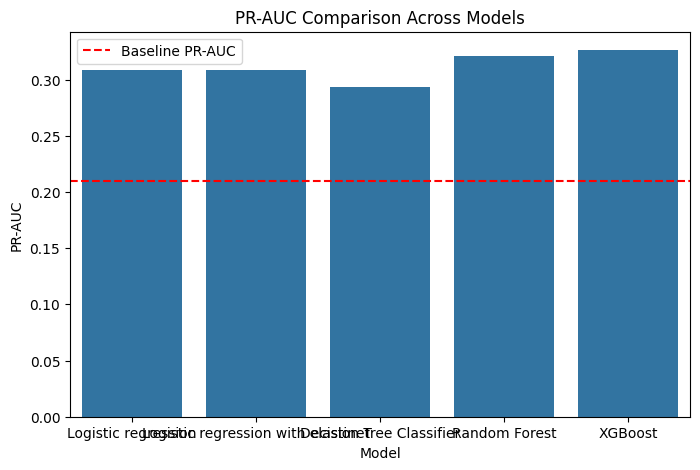

In [382]:


results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    x="Model",
    y="PR-AUC"
)
plt.axhline(0.21, color="red", linestyle="--", label="Baseline PR-AUC")
plt.title("PR-AUC Comparison Across Models")
plt.ylabel("PR-AUC")
plt.legend()
plt.show()


### SUMMARY

The baseline PR-AUC equals the default rate (0.21). Our XGBoost model achieves a PR-AUC of 0.32, representing a ~50% improvement over random ranking, indicating strong performance in identifying defaulters despite modest overall accuracy.
Although overall accuracy is similar across models, XGBoost consistently outperforms Logistic Regression and Random Forest in PR-AUC and F1-score, indicating superior ranking and classification performance for defaulters in an imbalanced setting. Hence, XGBoost was selected as the final model.